---
title: "HDA PySTAC-Client Introduction"
subtitle: "This notebook shows the basic use of DestinE Data Lake Harmonised Data Access using pystac-client."
author: "Christoph Reimer (EODC)"
tags: [STAC, Authentication, Access Token]
thumbnail: ../../img/STAC-01.png
license: MIT
copyright: "© 2025 EUMETSAT"
---
<div style="margin: 6px 0;">
  <a href="https://jupyter.central.data.destination-earth.eu/user-redirect/lab/tree/DestinE-DataLake-Lab/HDA/PySTAC/HDA-PyStac-Client.ipynb" target="_blank" style="text-decoration: none;">
    <span class="launch">🚀 Launch in JupyterHub</span>
  </a>
</div>

<div class="alert alert-block alert-warning">
<b> Prerequisites: </b>
   <li>To search and access DEDL data a <a href="https://platform.destine.eu/"> DestinE user account</a> is needed</li>
<b> References: </b>
    <li><a href="https://destine-data-lake-docs.data.destination-earth.eu/en/latest/dedl-discovery-and-data-access/Use-of-Harmonized-Data-Access/Use-of-Harmonized-Data-Access.html">DestinE Data Lake (DEDL) Harmonized Data Access (HDA) documentation</a> </li>
<b> Credit: </b><br>
    This notebook uses <a href="https://pystac.readthedocs.io/">PySTAC</a> <br>
    © PySTAC Developers <br>  
    Licensed under <a href="https://www.apache.org/licenses/LICENSE-2.0">Apache License 2.0</a>
</div>

This notebook shows the basic use of DestinE Data Lake Harmonised Data Access using pystac-client.
It will include iterating through Collections and Items, and perform simple spatio-temporal searches.

## Obtain DEDL Access Token to use the HDA service

In [1]:
import requests
import json
import os
from getpass import getpass
import destinelab as deauth

In [2]:
DESP_USERNAME = input("Please input your DESP username or email: ")
DESP_PASSWORD = getpass("Please input your DESP password: ")

auth = deauth.AuthHandler(DESP_USERNAME, DESP_PASSWORD)
access_token = auth.get_token()
if access_token is not None:
    print("DEDL/DESP Access Token Obtained Successfully")
else:
    print("Failed to Obtain DEDL/DESP Access Token")

auth_headers = {"Authorization": f"Bearer {access_token}"}

Please input your DESP username or email:  eum-dedl-user
Please input your DESP password:  ········


Response code: 200
DEDL/DESP Access Token Obtained Successfully


## Set username and password as environment variables to be used for DEDL data access

In [3]:
import os

os.environ["EODAG__DEDL__AUTH__CREDENTIALS__USERNAME"] = DESP_USERNAME
os.environ["EODAG__DEDL__AUTH__CREDENTIALS__PASSWORD"] = DESP_PASSWORD

# Create pystac client object for HDA STAC API
We first connect to an API by retrieving the root catalog, or landing page, of the API with the Client.open function.

In [4]:
from pystac_client import Client

HDA_API_URL = "https://hda.data.destination-earth.eu/stac/v2"
cat = Client.open(HDA_API_URL, headers=auth_headers)

## Query all available collections
As with a static catalog the get_collections function will iterate through the Collections in the Catalog. 
Notice that because this is an API it can get all the Collections through a single call, rather than having to fetch each one individually.

In [5]:
from rich.console import Console
import rich.table

console = Console()

hda_collections = cat.get_collections()

table = rich.table.Table(title="HDA collections", expand=True)
table.add_column("ID", style="cyan", justify="right",no_wrap=True)
table.add_column("Title", style="violet", no_wrap=True)
for collection in hda_collections:
    table.add_row(collection.id, collection.title)
console.print(table)

                                                  HDA collections                                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                      ID ┃ Title                                                                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                      EO.AERIS.DAT.IAGOS │ In-service Aircraft for a Global Observing System                     │
│                      EO.CLMS.DAT.CORINE │ CORINE Land Cover                                                     │
│               EO.CLMS.DAT.GLO.DMP300_V1 │ Dry Matter Productivity 2014-present (raster 300 m), global, 10-dail… │
│             EO.CLMS.DAT.GLO.FAPAR300_V1 │ Fraction of Absorbed Photosynthetically Active Radiation 2014-presen… │
│            EO.CLMS.DAT.GLO.FCOVER300_V1 │ Fraction of Green Vegetation Cover 2014-present (raster 300 m), glob… │
│              EO.CLMS.DAT.GLO.GDMP300_V1 │ Gross Dry Matter Productivity 2014-present (raster 300 m), global, 1… │
│               EO.CLMS.DAT.GLO.LAI300_V1 │ Leaf Area Index 2014-present (raster 300 m), global, 10-daily – vers… │
│              EO.CLMS.DAT.GLO.NDVI300_V1 │ Normalised Difference Vegetation Index 2014-2020 (raster 300 m), glo… │
│             EO.CLMS.DAT.GLO.NDVI_1KM_V2 │ Normalised Difference Vegetation Index 1998-2020 (raster 1 km), glob… │
│         EO.CLMS.DAT.SENTINEL-2.HRVPP.VI │ High Resolution Vegetation Phenology and Productivity: Vegetation In… │
│          EO.DEM.DAT.COP-DEM_GLO-30-DGED │ COPERNICUS Digital Elevation Model (DEM) 30 meters DGED               │
│          EO.DEM.DAT.COP-DEM_GLO-30-DTED │ COPERNICUS Digital Elevation Model (DEM) 30 meters DTED               │
│          EO.DEM.DAT.COP-DEM_GLO-90-DGED │ COPERNICUS Digital Elevation Model (DEM) 90 meters DGED               │
│          EO.DEM.DAT.COP-DEM_GLO-90-DTED │ COPERNICUS Digital Elevation Model (DEM) 90 meters DTED               │
│ EO.ECMWF.DAT.CAMS_EUROPE_AIR_QUALITY_F… │ CAMS European air quality forecasts                                   │
│ EO.ECMWF.DAT.CAMS_EUROPE_AIR_QUALITY_R… │ CAMS European air quality reanalyses                                  │
│ EO.ECMWF.DAT.CAMS_GLOBAL_ATMOSHERIC_CO… │ CAMS global atmospheric composition forecasts                         │
│ EO.ECMWF.DAT.CAMS_GLOBAL_EMISSION_INVE… │ CAMS global emission inventories                                      │
│ EO.ECMWF.DAT.CAMS_GLOBAL_FIRE_EMISSION… │ CAMS global biomass burning emissions based on fire radiative power … │
│ EO.ECMWF.DAT.CAMS_GLOBAL_GREENHOUSE_GA… │ CAMS global greenhouse gas reanalysis (EGG4)                          │
│ EO.ECMWF.DAT.CAMS_GLOBAL_GREENHOUSE_GA… │ CAMS global greenhouse gas reanalysis (EGG4) monthly averaged fields  │
│ EO.ECMWF.DAT.CAMS_GLOBAL_RADIATIVE_FOR… │ CAMS global radiative forcings                                        │
│ EO.ECMWF.DAT.CAMS_GLOBAL_RADIATIVE_FOR… │ CAMS global radiative forcing - auxilliary variables                  │
│ EO.ECMWF.DAT.CAMS_GLOBAL_REANALYSIS_EA… │ CAMS global reanalysis (EAC4)                                         │
│ EO.ECMWF.DAT.CAMS_GLOBAL_REANALYSIS_EA… │ CAMS global reanalysis (EAC4) monthly averaged fields                 │
│ EO.ECMWF.DAT.CAMS_GREENHOUSE_GAS_FLUXES │ CAMS global inversion-optimised greenhouse gas fluxes and concentrat… │
│ EO.ECMWF.DAT.CAMS_SOLAR_RADIATION_TIME… │ CAMS solar radiation time-series                                      │
│       EO.ECMWF.DAT.CEMS_FIRE_HISTORICAL │ Fire danger indices historical data from the Copernicus Emergency Ma… │
│       EO.ECMWF.DAT.CEMS_GLOFAS_FORECAST │ River discharge and related forecasted data by the European Flood Aw… │
│     EO.ECMWF.DAT.CEMS_GLOFAS_HISTORICAL │ River discharge and related historical data from the Global Flood Aw… │
│     EO.ECMWF.DAT.CEMS_GLOFAS_REFORECAST │ Reforecasts 

## Obtain provider information for each individual collection

In [6]:
table = rich.table.Table(title="HDA collections | Providers", expand=True)
table.add_column("Title", style="cyan", justify="right", no_wrap=True)
table.add_column("Provider", style="violet", no_wrap=True)

hda_collections = cat.get_collections()

for collection in hda_collections:
    collection_details = cat.get_collection(collection.id)
    provider = ','.join(str(x.name) for x in collection_details.providers)
    table.add_row(collection_details.title, provider)
console.print(table)

                                            HDA collections | Providers                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                  Title ┃ Provider                                               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      In-service Aircraft for a Global Observing System │ IAGOS-CORE,FZ Jülich,IAGOS-DC                          │
│                                      CORINE Land Cover │ European Environment Agency                            │
│ Dry Matter Productivity 2014-present (raster 300 m), … │ VITO NV,European Commission Directorate-General for I… │
│ Fraction of Absorbed Photosynthetically Active Radiat… │ VITO NV,European Commission Directorate-General for I… │
│ Fraction of Green Vegetation Cover 2014-present (rast… │ VITO NV,European Commission Directorate-General for I… │
│ Gross Dry Matter Productivity 2014-present (raster 30… │ VITO NV,European Commission Directorate-General for I… │
│ Leaf Area Index 2014-present (raster 300 m), global, … │ VITO NV,European Commission Directorate-General for I… │
│ Normalised Difference Vegetation Index 2014-2020 (ras… │ VITO NV,European Commission Directorate-General for I… │
│ Normalised Difference Vegetation Index 1998-2020 (ras… │ VITO NV,European Commission Directorate-General for I… │
│ High Resolution Vegetation Phenology and Productivity… │ VITO NV,European Union represented by the European Co… │
│ COPERNICUS Digital Elevation Model (DEM) 30 meters DG… │ ESA                                                    │
│ COPERNICUS Digital Elevation Model (DEM) 30 meters DT… │ ESA                                                    │
│ COPERNICUS Digital Elevation Model (DEM) 90 meters DG… │ ESA                                                    │
│ COPERNICUS Digital Elevation Model (DEM) 90 meters DT… │ ESA                                                    │
│                    CAMS European air quality forecasts │ ECMWF                                                  │
│                   CAMS European air quality reanalyses │ ECMWF                                                  │
│          CAMS global atmospheric composition forecasts │ ECMWF                                                  │
│                       CAMS global emission inventories │ ECMWF                                                  │
│ CAMS global biomass burning emissions based on fire r… │ ECMWF                                                  │
│           CAMS global greenhouse gas reanalysis (EGG4) │ ECMWF                                                  │
│ CAMS global greenhouse gas reanalysis (EGG4) monthly … │ ECMWF                                                  │
│                         CAMS global radiative forcings │ ECMWF                                                  │
│   CAMS global radiative forcing - auxilliary variables │ ECMWF                                                  │
│                          CAMS global reanalysis (EAC4) │ ECMWF                                                  │
│  CAMS global reanalysis (EAC4) monthly averaged fields │ ECMWF                                                  │
│ CAMS global inversion-optimised greenhouse gas fluxes… │ ECMWF                                                  │
│                       CAMS solar radiation time-series │ ECMWF                                                  │
│ Fire danger indices historical data from the Copernic… │ ECMWF                                                  │
│ River discharge and related forecasted data by the Eu… │ ECMWF                                                  │
│ River discharge and related historical data from the … │ ECMWF                                                  │
│ Reforecasts of river discharge and related data by th…

## Inspect Items of a Collection
The main functions for getting items return iterators, where pystac-client will handle retrieval of additional pages when needed. Note that one request is made for the first ten items, then a second request for the next ten.

In [7]:
coll_name = 'EO.ESA.DAT.SENTINEL-1.L1_GRD'
search = cat.search(
    max_items=10,
    collections=[coll_name],
    bbox=[-72.5,40.5,-72,41],
    datetime="2023-09-09T00:00:00Z/2023-09-20T23:59:59Z"
)

coll_items = search.item_collection()
console.print(f"For collection {coll_name} we found {len(coll_items)} items")

For collection EO.ESA.DAT.SENTINEL-1.L1_GRD we found 4 items

In [8]:
import geopandas

df = geopandas.GeoDataFrame.from_features(coll_items.to_dict(), crs="epsg:4326")
df.head()



,geometry,ecmwf:origin,order:status,platform,storage:tier,product:timeliness,processing:level,published,sat:orbit_state,sat:absolute_orbit,...,totalSlices,productClass,processorVersion,segmentStartTime,sliceProductFlag,productComposition,instrumentConfigurationID,beginningDateTime,endingDateTime,federation:backends
0,"POLYGON ((-72.73724 38.96255, -69.78494 39.365...",ESA,succeeded,A,online,Fast-24h,LEVEL1,2023-09-10T03:08:24.290833Z,ASCENDING,50257,...,16,S,3.61,2023-09-09T22:41:16.742000Z,False,Slice,7,2023-09-09T22:43:00.442715Z,2023-09-09T22:43:25.441630Z,[external_fdp]
1,"POLYGON ((-73.11689 40.46453, -70.09798 40.866...",ESA,succeeded,A,online,Fast-24h,LEVEL1,2023-09-10T02:57:13.326147Z,ASCENDING,50257,...,16,S,3.61,2023-09-09T22:41:16.742000Z,False,Slice,7,2023-09-09T22:43:25.443129Z,2023-09-09T22:43:50.442045Z,[external_fdp]
2,"POLYGON ((-74.73586 38.73753, -71.84171 39.134...",ESA,succeeded,A,online,Fast-24h,LEVEL1,2023-09-15T01:29:55.385908Z,ASCENDING,50330,...,7,S,3.61,2023-09-14T22:49:26.753000Z,False,Slice,7,2023-09-14T22:51:10.454096Z,2023-09-14T22:51:35.452004Z,[external_fdp]
3,"POLYGON ((-75.11328 40.2397, -72.15421 40.6353...",ESA,succeeded,A,online,Fast-24h,LEVEL1,2023-09-15T01:28:07.158995Z,ASCENDING,50330,...,7,S,3.61,2023-09-14T22:49:26.753000Z,False,Slice,7,2023-09-14T22:51:35.453501Z,2023-09-14T22:52:00.452905Z,[external_fdp]


## Inspect STAC assets of an item

In [9]:
import rich.table

selected_item = coll_items[3]

table = rich.table.Table(title="Assets in STAC Item")
table.add_column("Asset Key", style="cyan", no_wrap=True)
table.add_column("Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

console.print(table)

                                                Assets in STAC Item                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key               ┃ Description                                                                           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ SAFE-report.pdf         │ S1A_IW_GRDH_1SDV_20230914T225135_20230914T225200_050330_060F40_9F54.SAFE-report-2023… │
│ VH                      │ s1a-iw-grd-vh-20230914t225135-20230914t225200-050330-060f40-002.tiff                  │
│ VV                      │ s1a-iw-grd-vv-20230914t225135-20230914t225200-050330-060f40-001.tiff                  │
│ calibration-vh-f40.xml  │ calibration-s1a-iw-grd-vh-20230914t225135-20230914t225200-050330-060f40-002.xml       │
│ calibration-vv-f40.xml  │ calibration-s1a-iw-grd-vv-20230914t225135-20230914t225200-050330-060f40-001.xml       │
│ level-1-calibration.xsd │ s1-level-1-calibration.xsd                                                            │
│ level-1-measurement.xsd │ s1-level-1-measurement.xsd                                                            │
│ level-1-noise.xsd       │ s1-level-1-noise.xsd                                                                  │
│ level-1-product.xsd     │ s1-level-1-product.xsd                                                                │
│ level-1-quicklook.xsd   │ s1-level-1-quicklook.xsd                                                              │
│ level-1-rfi.xsd         │ s1-level-1-rfi.xsd                                                                    │
│ logo.png                │ logo.png                                                                              │
│ manifest.safe           │ manifest.safe                                                                         │
│ map-overlay.kml         │ map-overlay.kml                                                                       │
│ map-overlay.xsd         │ s1-map-overlay.xsd                                                                    │
│ noise-vh-f40.xml        │ noise-s1a-iw-grd-vh-20230914t225135-20230914t225200-050330-060f40-002.xml             │
│ noise-vv-f40.xml        │ noise-s1a-iw-grd-vv-20230914t225135-20230914t225200-050330-060f40-001.xml             │
│ object-types.xsd        │ s1-object-types.xsd                                                                   │
│ product-previ.html      │ product-preview.html                                                                  │
│ product-previ.xsd       │ s1-product-preview.xsd                                                                │
│ quick-look.png          │ quick-look.png                                                                        │
│ rfi-vh-f40.xml          │ rfi-s1a-iw-grd-vh-20230914t225135-20230914t225200-050330-060f40-002.xml               │
│ rfi-vv-f40.xml          │ rfi-s1a-iw-grd-vv-20230914t225135-20230914t225200-050330-060f40-001.xml               │
│ thumbnail.png           │ thumbnail.png                                                                         │
│ vh-f40.xml              │ s1a-iw-grd-vh-20230914t225135-20230914t225200-050330-060f40-002.xml                   │
│ vv-f40.xml              │ s1a-iw-grd-vv-20230914t225135-20230914t225200-050330-060f40-001.xml                   │
│ downloadLink            │ Download link                                                                         │
└─────────────────────────┴───────────────────────────────────────────────────────────────────────────────────────┘

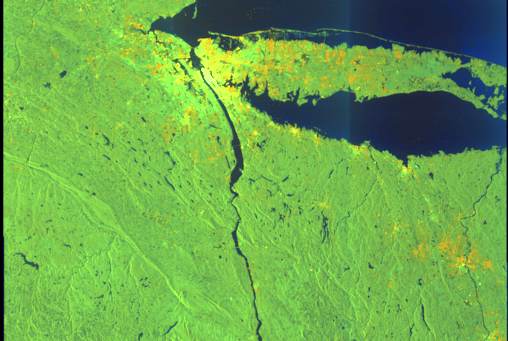

In [10]:
from IPython.display import Image
url =selected_item.assets["quick-look.png"].href
headers = {
    "Authorization": "Bearer " + access_token
}

response = requests.get(url, headers=headers)
response.raise_for_status()

Image(data=response.content)

In [11]:
down_uri = selected_item.assets["downloadLink"].href
console.print(f"Download link of asset is {down_uri}")

Download link of asset is 
https://hda-download.lumi.data.destination-earth.eu/data/external_fdp/EO.ESA.DAT.SENTINEL-1.L1_GRD/S1A_IW_GRDH_1SDV
_20230914T225135_20230914T225200_050330_060F40_9F54/downloadLink

### Download asset to JupyterLab

In [12]:
selected_item.id

'S1A_IW_GRDH_1SDV_20230914T225135_20230914T225200_050330_060F40_9F54'

In [13]:
selected_item.assets["downloadLink"]

<Asset href=https://hda-download.lumi.data.destination-earth.eu/data/external_fdp/EO.ESA.DAT.SENTINEL-1.L1_GRD/S1A_IW_GRDH_1SDV_20230914T225135_20230914T225200_050330_060F40_9F54/downloadLink>

In [ ]:
# Make http request for remote file data
data = requests.get(selected_item.assets["downloadLink"].href,
                   headers=auth_headers)
mtype = selected_item.assets["downloadLink"].media_type.split("/")[1]
# Save file data to local copy
with open(f"{selected_item.id}.{mtype}", 'wb')as file:
    file.write(data.content)